In [ ]:
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15067, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 15067 (delta 31), reused 28 (delta 12), pack-reused 15001
Receiving objects: 100% (15067/15067), 14.15 MiB | 22.82 MiB/s, done.
Resolving deltas: 100% (10316/10316), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 317.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Setup complete. Using torch 1.13

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="uv4PHCgERDUZxqDR8bdE")
project = rf.workspace("interiit-humanoid").project("cad-detector")
dataset = project.version(13).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to cad-detector-13 in yolov5pytorch:: 100%|██████████| 662/662 [00:00<00:00, 2290.15it/s]


In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
!python train.py --img 640 --batch 32 --epochs 200 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/cad-detector-13/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=

In [ ]:
# Run evaluation
!python detect.py --weights /content/93_best_accuracy_latest.pt --conf 0.5 --source /content/yolov5/cad-detector-13/test/images --save-txt --save-crop


detect: weights=['/content/93_best_accuracy_latest.pt'], source=/content/yolov5/cad-detector-13/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-74-gd02ee60 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/15 /content/yolov5/cad-detector-13/test/images/173d0880-c539-4f79-ac5e-308df91c360c_PNG.rf.524dbff6023fa6dd5f9cf967bb43e4e0.jpg: 640x640 1 Car-plug, 12.6ms
image 2/15 /content/yolov5/cad-detector-13/test/images/22772099-b619-4350-9258-0587aa5ac86e_PNG.rf.c0e15bec2fe54f73ba871447b1b432aa.jpg: 640x640 1 Car-plug, 

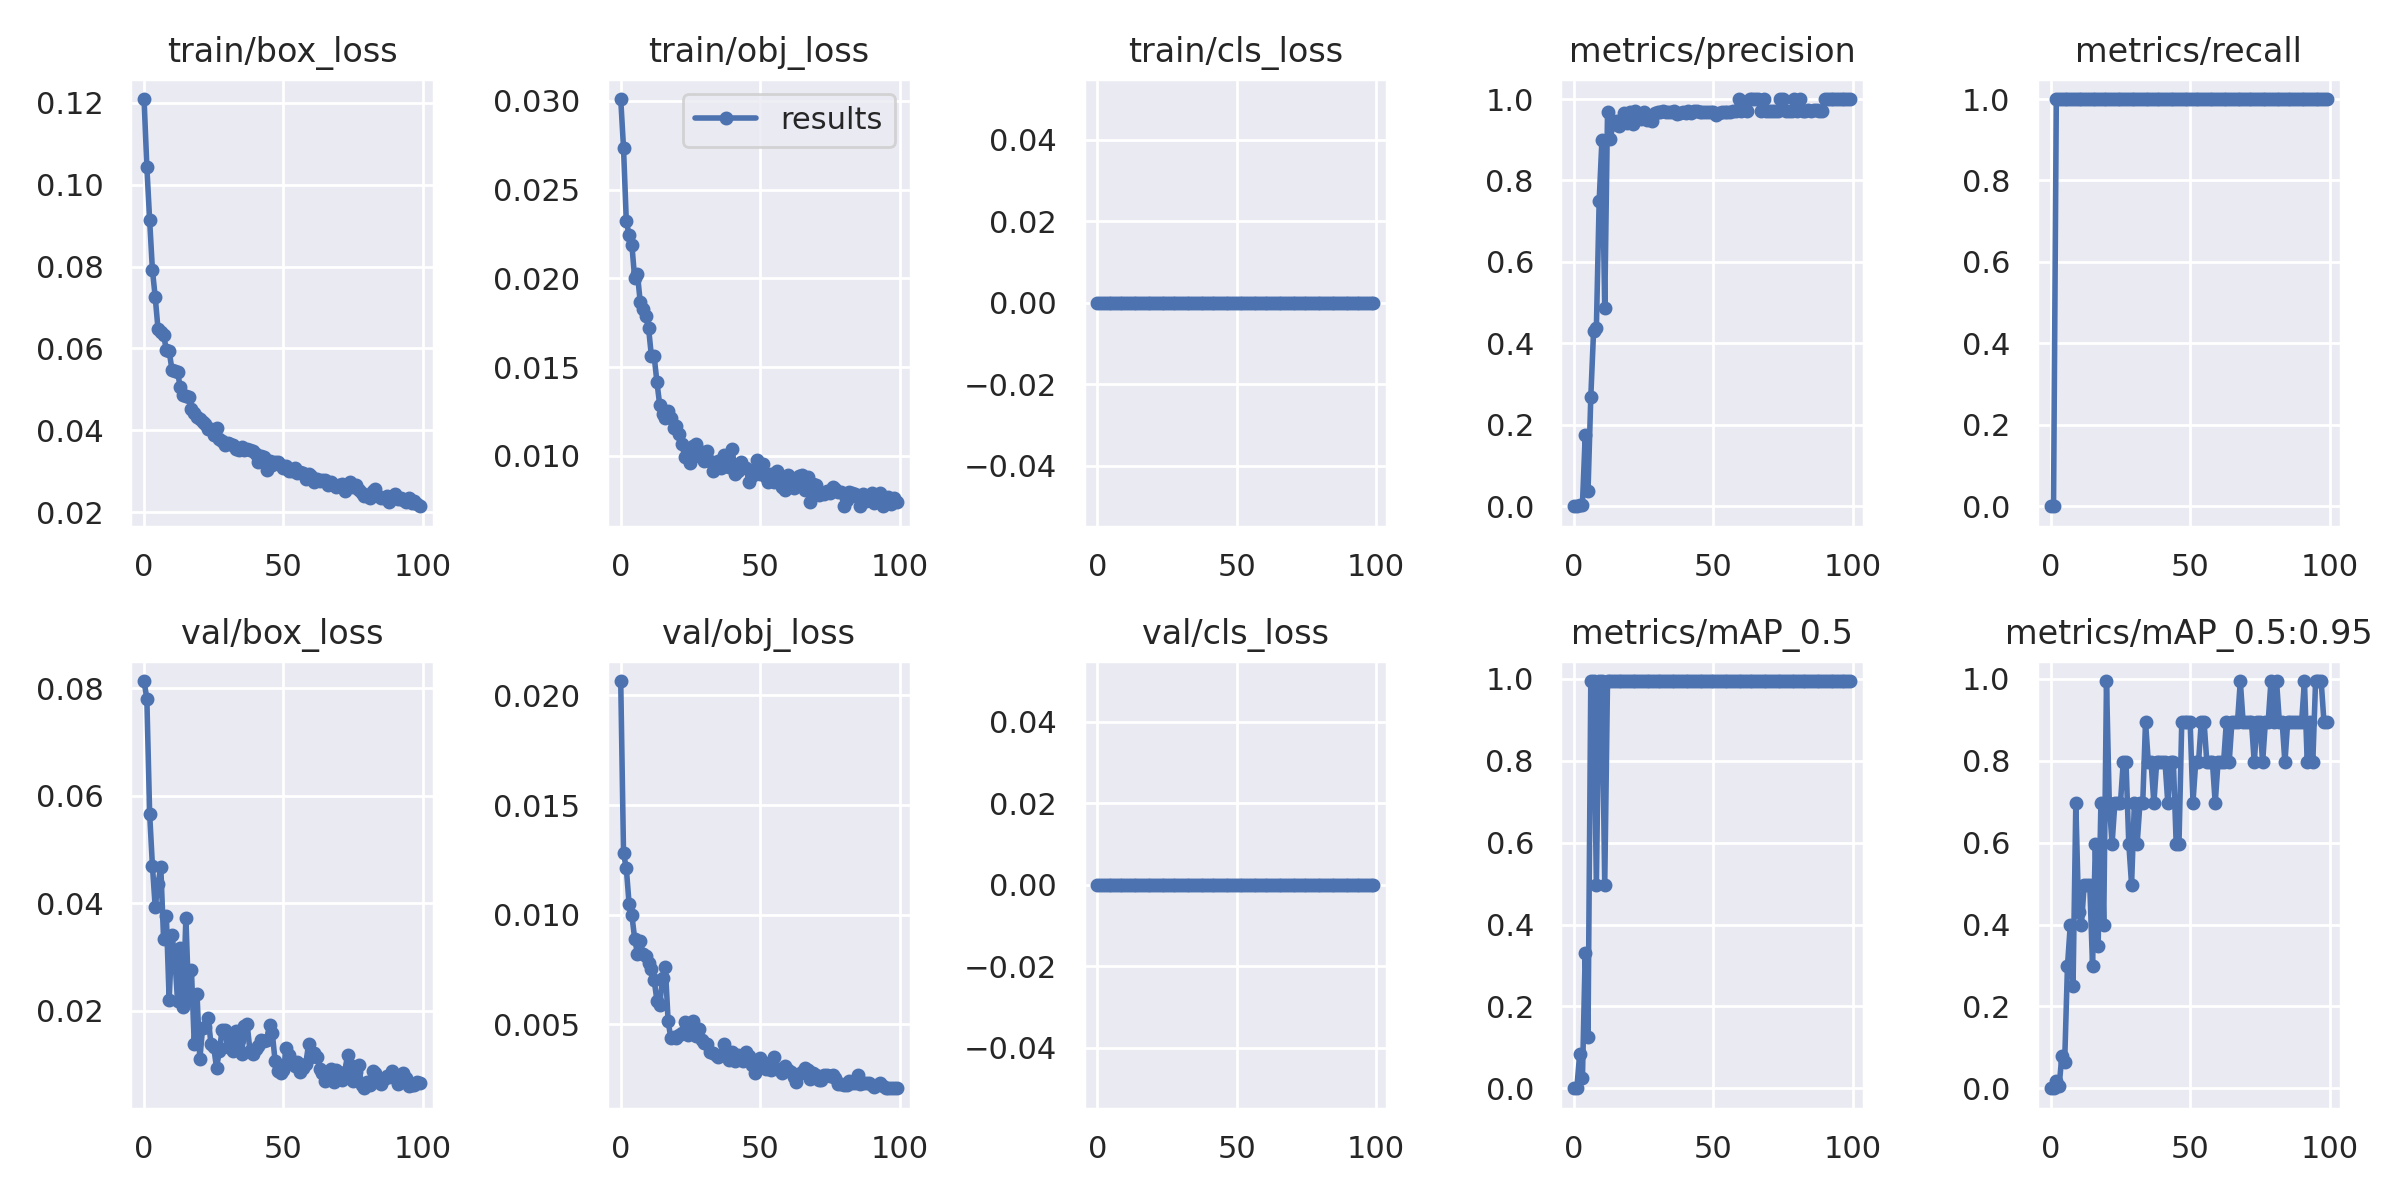

In [6]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('result.png')
cv2_imshow(image)